In [1]:
# Imports
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
# Load file
data = np.genfromtxt("./parkour2/run3.txt", delimiter=",")
distances = np.genfromtxt("./parkour2/run3_as.txt", delimiter=",")

## CoM

In [3]:
# CoM error between prediction and real
real_com = data[:, :2]
predicted_com = data[:, 2:4]

In [4]:
com_diff = np.abs(real_com - predicted_com)

In [5]:
print("Highest error between real and predicted com: ", np.max(com_diff[:, 0]), np.max(com_diff[:, 1]))
print("Lowest error between real and predicted com: ", np.min(com_diff[:, 0]), np.min(com_diff[:, 1]))
print("Average error between real and predicted com: ", np.mean(com_diff[:, 0]), np.mean(com_diff[:, 1]))

Highest error between real and predicted com:  0.08694000000000002 0.059224
Lowest error between real and predicted com:  2.0000000000131024e-05 0.0003539000000000042
Average error between real and predicted com:  0.01306738374999999 0.011051301125


## Footsteps

In [6]:
# Adjust footsetp symmetry
for x in range(len(data)):
    if (data[x, 4] > data[x, 6]) != (data[x, 12] > data[x, 14]):
        data[x, 4], data[x, 6] = data[x, 6], data[x, 4]
        data[x, 8], data[x, 10] = data[x, 10], data[x, 8]

In [7]:
"""
count = 0
for x in range(100):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    
    if (data[x, 4] > data[x, 6]) != (data[x, 12] > data[x, 14]):
        data[x, 4], data[x, 6] = data[x, 6], data[x, 4]
        data[x, 8], data[x, 10] = data[x, 10], data[x, 8]
        print("Switched...")
        
    ax1.scatter(data[x, 4:12:2], data[x, 5:12:2], marker='o', label="Real Footsteps")
    ax1.scatter(data[x, 12:20:2], data[x, 13:20:2], marker='s', label="Predicted")
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    plt.show()

print("Skipped: ", count)
"""

'\ncount = 0\nfor x in range(100):\n    fig = plt.figure()\n    ax1 = fig.add_subplot(111)\n    \n    if (data[x, 4] > data[x, 6]) != (data[x, 12] > data[x, 14]):\n        data[x, 4], data[x, 6] = data[x, 6], data[x, 4]\n        data[x, 8], data[x, 10] = data[x, 10], data[x, 8]\n        print("Switched...")\n        \n    ax1.scatter(data[x, 4:12:2], data[x, 5:12:2], marker=\'o\', label="Real Footsteps")\n    ax1.scatter(data[x, 12:20:2], data[x, 13:20:2], marker=\'s\', label="Predicted")\n    ax1.set_xlabel(\'X\')\n    ax1.set_ylabel(\'Y\')\n    plt.show()\n\nprint("Skipped: ", count)\n'

In [8]:
footsteps_diff = np.abs(data[:, 4:12] - data[:, 12:20])
#new_idxs = np.delete(np.where(footsteps_diff[:, 0] >= 0.0)[0], np.where(footsteps_diff[:, 0] > 0.04)[0])
#footsteps_diff = footsteps_diff[new_idxs, :]

In [9]:
max(footsteps_diff[:, 0])

0.07625000000000015

In [10]:
real_footsteps = data[:, 4:12]
predicted_footsteps = data[:, 12:20]

In [11]:
# Swinging booleans
fr_rl_swinging = np.where(real_footsteps[:, 2] > real_footsteps[:, 0])[0]
fl_rr_swinging = np.where(real_footsteps[:, 0] > real_footsteps[:, 2])[0]
print(fr_rl_swinging.shape)
print(fl_rr_swinging.shape)

(47,)
(33,)


In [12]:
print("Highest error for FL foot: ", np.max(footsteps_diff[fl_rr_swinging, 0]), np.max(footsteps_diff[fl_rr_swinging, 1]))
print("Lowest error for FL foot: ", np.min(footsteps_diff[fl_rr_swinging, 0]), np.min(footsteps_diff[fl_rr_swinging, 1]))
print("Average error for FL foot: ", np.mean(footsteps_diff[fl_rr_swinging, 0]), np.mean(footsteps_diff[fl_rr_swinging, 1]))

Highest error for FL foot:  0.07625000000000015 0.02207199999999998
Lowest error for FL foot:  0.00046999999999997044 4.000000000004e-06
Average error for FL foot:  0.011195575757575729 0.006483212121212124


In [13]:
print("Highest error for FR foot: ", np.max(footsteps_diff[fl_rr_swinging, 2]), np.max(footsteps_diff[fr_rl_swinging, 3]))
print("Lowest error for FR foot: ", np.min(footsteps_diff[fr_rl_swinging, 2]), np.min(footsteps_diff[fr_rl_swinging, 3]))
print("Average error for FR foot: ", np.mean(footsteps_diff[fr_rl_swinging, 2]), np.mean(footsteps_diff[fr_rl_swinging, 3]))

Highest error for FR foot:  0.023840000000000305 0.0685649
Lowest error for FR foot:  4.999999999988347e-05 2.3499999999995747e-05
Average error for FR foot:  0.008497042553191522 0.010634238297872339


In [14]:
print("Highest error for RL foot: ", np.max(footsteps_diff[fr_rl_swinging, 4]), np.max(footsteps_diff[fr_rl_swinging, 5]))
print("Lowest error for RL foot: ", np.min(footsteps_diff[fr_rl_swinging, 4]), np.min(footsteps_diff[fr_rl_swinging, 5]))
print("Average error for RL foot: ", np.mean(footsteps_diff[fr_rl_swinging, 4]), np.mean(footsteps_diff[fr_rl_swinging, 5]))

Highest error for RL foot:  0.04206999999999983 0.06727799999999998
Lowest error for RL foot:  2.0000000000131024e-05 3.0000000000030003e-05
Average error for RL foot:  0.008938200000000007 0.01014472340425532


In [15]:
print("Highest error for RR foot: ", np.max(footsteps_diff[fl_rr_swinging, 6]), np.max(footsteps_diff[fl_rr_swinging, 7]))
print("Lowest error for RR foot: ", np.min(footsteps_diff[fl_rr_swinging, 6]), np.min(footsteps_diff[fl_rr_swinging, 7]))
print("Average error for RR foot: ", np.mean(footsteps_diff[fl_rr_swinging, 6]), np.mean(footsteps_diff[fl_rr_swinging, 7]))

Highest error for RR foot:  0.07318999999999987 0.023612300000000003
Lowest error for RR foot:  0.00024000000000001798 6.399999999998074e-05
Average error for RR foot:  0.010898703030303039 0.006332436060606061


## Edges

In [343]:
# X coordinates of the obstaces edge
stairs = 12
depth = 3/stairs
edges_up = [1 + depth * x for x in range(stairs)] 
edges_down = [(edges_up[-1] + 2 * depth + 1) + depth * x for x in range(stairs)]
edges = edges_up + edges_down

In [344]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [345]:
# Compute minimum distance from any obstacle
def get_min_edge_distances(footsteps_dataset):
    min_edge_distances = []
    for footstep in footsteps_dataset:
        temp = []
        for idx in range(len(footstep)):
            if idx in [0, 2, 4, 6]:
                temp.append(find_nearest(edges, footstep[idx]))
        min_edge_distances.append(temp)
        
    return np.array(min_edge_distances)

In [346]:
real_edge_distances = np.abs(real_footsteps[:, ::2] - get_min_edge_distances(real_footsteps))
predicted_edge_distances = np.abs(predicted_footsteps[:, ::2] - get_min_edge_distances(predicted_footsteps))

In [309]:
min_distance = 0.015

In [310]:
print("Lowest distance for FL foot: ", np.min(real_edge_distances[fl_rr_swinging, 0]), np.min(predicted_edge_distances[fl_rr_swinging, 0]))
print(f"Number of contacts with less than {min_distance} distance: ", len(np.where(real_edge_distances[fl_rr_swinging, 0] < min_distance)[0]))

Lowest distance for FL foot:  0.005101000000000022 0.008391999999999955
Number of contacts with less than 0.015 distance:  1


In [311]:
print("Lowest distance for FR foot: ", np.min(real_edge_distances[fr_rl_swinging, 1]), np.min(predicted_edge_distances[fr_rl_swinging, 1]))
print(f"Number of contacts with less than {min_distance} distance: ", len(np.where(real_edge_distances[fr_rl_swinging, 1] < min_distance)[0]))

Lowest distance for FR foot:  0.003090000000000037 0.0010099999999999554
Number of contacts with less than 0.015 distance:  1


In [312]:
print("Lowest distance for RL foot: ", np.min(real_edge_distances[fr_rl_swinging, 2]), np.min(predicted_edge_distances[fr_rl_swinging, 2]))
print(f"Number of contacts with less than {min_distance} distance: ", len(np.where(real_edge_distances[fr_rl_swinging, 2] < min_distance)[0]))

Lowest distance for RL foot:  0.02898999999999985 0.03420999999999985
Number of contacts with less than 0.015 distance:  0


In [313]:
print("Lowest distance for RR foot: ", np.min(real_edge_distances[fl_rr_swinging, 3]), np.min(predicted_edge_distances[fl_rr_swinging, 3]))
print(f"Number of contacts with less than {min_distance} distance: ", len(np.where(real_edge_distances[fl_rr_swinging, 3] < min_distance)[0]))

Lowest distance for RR foot:  0.007080000000000197 0.031709999999999905
Number of contacts with less than 0.015 distance:  1


In [314]:
print("Number of FL/RR: ", len(real_edge_distances[fl_rr_swinging, 0]))

Number of FL/RR:  40


In [315]:
print("Number of FR/RL: ", len(real_edge_distances[fr_rl_swinging, 0]))

Number of FR/RL:  41


## Velocities

In [316]:
velocity_counter = Counter(data[:, -1])

In [317]:
print("Velocities commanded: ", set(data[:, -1]))

Velocities commanded:  {0.9, 0.6, 0.3, 0.4, 0.7, 0.1, 0.8, 0.2, 0.5}


In [318]:
print("Cound of velocities: ", velocity_counter)

Cound of velocities:  Counter({0.1: 28, 0.9: 26, 0.2: 8, 0.4: 5, 0.5: 5, 0.8: 4, 0.6: 2, 0.7: 2, 0.3: 1})


In [319]:
velocity_counter[0.3000000]

1

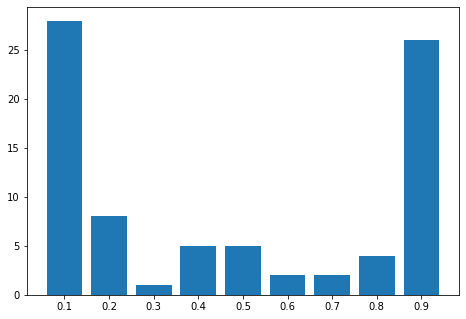

In [320]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = [str(round(velocity, 1)) for velocity in np.arange(0.1, 1, 0.1)]
y = [velocity_counter[round(velocity, 1)] for velocity in np.arange(0.1, 1, 0.1)]
ax.bar(x, y)
plt.show()

In [16]:
min_distance = 0.015

In [17]:
print("Lowest distance for FL foot: ", np.min(distances[:, 0]))
print(f"Number of contacts with less than {min_distance} distance: ", len(np.where(distances[:, 0] < min_distance)[0]))

Lowest distance for FL foot:  0.0
Number of contacts with less than 0.015 distance:  1


In [18]:
print("Lowest distance for FR foot: ", np.min(distances[:, 1]))
print(f"Number of contacts with less than {min_distance} distance: ", len(np.where(distances[:, 1] < min_distance)[0]))

Lowest distance for FR foot:  0.00955002
Number of contacts with less than 0.015 distance:  314


In [19]:
print("Lowest distance for RL foot: ", np.min(distances[:, 2]))
print(f"Number of contacts with less than {min_distance} distance: ", len(np.where(distances[:, 2] < min_distance)[0]))

Lowest distance for RL foot:  0.0191
Number of contacts with less than 0.015 distance:  0


In [20]:
print("Lowest distance for RR foot: ", np.min(distances[:, 3]))
print(f"Number of contacts with less than {min_distance} distance: ", len(np.where(distances[:, 3] < min_distance)[0]))

Lowest distance for RR foot:  0.0
Number of contacts with less than 0.015 distance:  7
